In [4]:
import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def make_classification(r0=1, r1=3, k=1000):
    """
    Creación de los datos
    """
    X1 = [np.array([r0*np.cos(t), r0*np.sin(t)]) for t in range(0,k)]
    X2 = [np.array([r1*np.cos(t), r1*np.sin(t)]) for t in range(0,k)]

    X = np.concatenate((X1,X2))
    n, d = X.shape
    Y = np.zeros(2*k)
    Y[k:] += 1
    noise = np.array([np.random.normal(0,1,2) for i in range(n)])

    return X, Y

In [5]:
X, y = make_classification()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

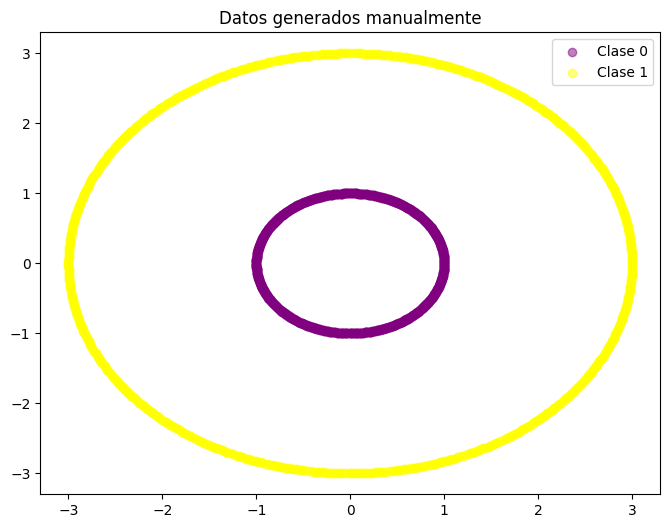

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:,1], color='purple', label='Clase 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:,1], color='yellow', label='Clase 1', alpha=0.5)
plt.title('Datos generados manualmente')
plt.legend()
plt.show()